## Обучите модель на базе любого модуля из https://github.com/scikit-learn/scikit-learn/tree/master/sklearn предсказывать последовательность слов(кода)

#### Буду использовать KMeans  в cluster и TSNE в manifold

In [1]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense,Input
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential,Model
import keras.utils as ku 
import numpy as np

Using TensorFlow backend.


In [2]:
data = """У лукоморья дуб зелёный;
Златая цепь на дубе том:
И днём и ночью кот учёный
Всё ходит по цепи кругом;
Идёт направо - песнь заводит,
Налево - сказку говорит.
Там чудеса: там леший бродит,
Русалка на ветвях сидит;
Там на неведомых дорожках
Следы невиданных зверей;
Избушка там на курьих ножках
Стоит без окон, без дверей;
Там лес и дол видений полны;
Там о заре прихлынут волны
На брег песчаный и пустой,
И тридцать витязей прекрасных
Чредой из вод выходят ясных,
И с ними дядька их морской;
Там королевич мимоходом
Пленяет грозного царя;
Там в облаках перед народом
Через леса, через моря
Колдун несёт богатыря;
В темнице там царевна тужит,
А бурый волк ей верно служит;
Там ступа с Бабою Ягой
Идёт, бредёт сама собой,
Там царь Кащей над златом чахнет;
Там русский дух... там Русью пахнет!
И там я был, и мёд я пил;
У моря видел дуб зелёный;
Под ним сидел, и кот учёный
Свои мне сказки говорил."""

In [3]:
tokenizer = Tokenizer()

In [4]:
def dataset_preparation(data):
	corpus = data.lower().split("\n")
  
	tokenizer.fit_on_texts(corpus)
	total_words = len(tokenizer.word_index) + 1

	input_sequences = []
	for line in corpus:
		token_list = tokenizer.texts_to_sequences([line])[0]
		for i in range(1, len(token_list)):
			n_gram_sequence = token_list[:i+1]
			input_sequences.append(n_gram_sequence)

	max_sequence_len = max([len(x) for x in input_sequences])
	input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

	predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
	label = ku.to_categorical(label, num_classes=total_words)

	return predictors, label, max_sequence_len, total_words

In [5]:
def create_model(predictors, label, max_sequence_len, total_words):
	
	model = Sequential()
	model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
	model.add(LSTM(150, return_sequences = True))
	model.add(LSTM(100))
	model.add(Dense(total_words, activation='softmax'))

	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
	model.fit(predictors, label, epochs=100, verbose=1, callbacks=[earlystop])
	return model 

In [6]:
def generate_text(seed_text, next_words, max_sequence_len):
	for _ in range(next_words):
		token_list = tokenizer.texts_to_sequences([seed_text])[0]
		token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
		predicted = model.predict_classes(token_list, verbose=0)
		
		output_word = ""
		for word, index in tokenizer.word_index.items():
			if index == predicted:
				output_word = word
				break
		seed_text += " " + output_word
	return seed_text

In [7]:
predictors, label, max_sequence_len, total_words = dataset_preparation(data)

In [8]:
model = create_model(predictors, label, max_sequence_len, total_words)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
124/124 [==============================] - 1s 10ms/step - loss: 4.7970 - acc: 0.0081
Epoch 2/100
124/124 [==============================] - 0s 625us/step - loss: 4.7923 - acc: 0.0403
Epoch 3/100
124/124 [==============================] - 0s 701us/step - loss: 4.7876 - acc: 0.0403
Epoch 4/100
 32/124 [======>.......................] - ETA: 0s - loss: 4.7852 - acc: 0.0000e+00

/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:494: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


124/124 [==============================] - 0s 837us/step - loss: 4.7806 - acc: 0.0242
Epoch 5/100
124/124 [==============================] - 0s 929us/step - loss: 4.7680 - acc: 0.0323
Epoch 6/100
124/124 [==============================] - 0s 694us/step - loss: 4.7363 - acc: 0.0242
Epoch 7/100
124/124 [==============================] - 0s 630us/step - loss: 4.6830 - acc: 0.0403
Epoch 8/100
124/124 [==============================] - 0s 849us/step - loss: 4.6673 - acc: 0.0403
Epoch 9/100
124/124 [==============================] - 0s 810us/step - loss: 4.6408 - acc: 0.0403
Epoch 10/100
124/124 [==============================] - 0s 734us/step - loss: 4.6140 - acc: 0.0242
Epoch 11/100
124/124 [==============================] - 0s 956us/step - loss: 4.6108 - acc: 0.0242
Epoch 12/100
124/124 [==============================] - 0s 876us/step - loss: 4.6005 - acc: 0.0484
Epoch 13/100
124/124 [==============================] - 0s 674us/step - loss: 4.5884 - acc: 0.0403
Epoch 14/100
124/124 [======

Epoch 87/100
124/124 [==============================] - 0s 703us/step - loss: 2.8737 - acc: 0.2581
Epoch 88/100
124/124 [==============================] - 0s 635us/step - loss: 2.8551 - acc: 0.2742
Epoch 89/100
124/124 [==============================] - 0s 599us/step - loss: 2.8325 - acc: 0.2661
Epoch 90/100
124/124 [==============================] - 0s 611us/step - loss: 2.8174 - acc: 0.2903
Epoch 91/100
124/124 [==============================] - 0s 608us/step - loss: 2.8012 - acc: 0.2984
Epoch 92/100
124/124 [==============================] - 0s 589us/step - loss: 2.7994 - acc: 0.2903
Epoch 93/100
124/124 [==============================] - 0s 584us/step - loss: 2.7875 - acc: 0.2903
Epoch 94/100
124/124 [==============================] - 0s 589us/step - loss: 2.8041 - acc: 0.2984
Epoch 95/100
124/124 [==============================] - 0s 639us/step - loss: 2.8146 - acc: 0.2823
Epoch 96/100
124/124 [==============================] - 0s 595us/step - loss: 2.7638 - acc: 0.2903
Epoch 97/1

In [9]:
print(generate_text("Златая цепь", 3, max_sequence_len))

Златая цепь на и кот


In [10]:
embl = model.layers[0]

In [11]:
X_ = embl.get_weights()[0]

In [12]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.pylab import plt
kmeans = KMeans(n_clusters=4, random_state=400).fit(X_)

In [13]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_)

In [14]:
viz_words=['дуб','дух','дядька','златом','златая','цепь','волк']

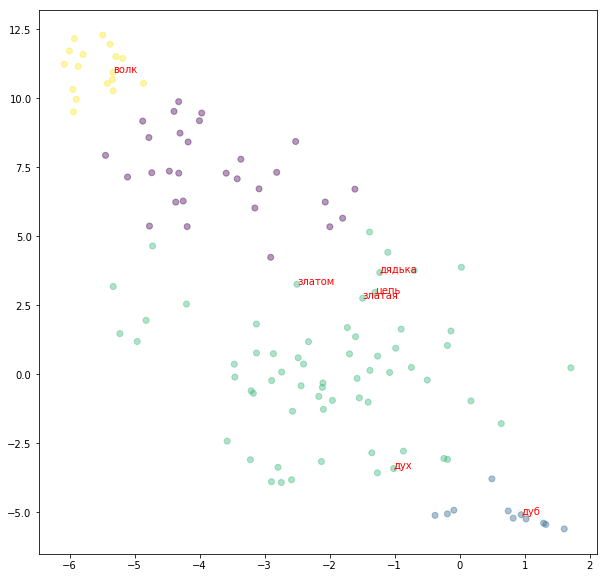

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=kmeans.labels_, alpha=0.4)
for word in viz_words:
    ind = tokenizer.word_index[word]
    plt.text(X_embedded[ind,0], X_embedded[ind,1], word, color='red', size=10)
plt.show()